In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import numpy as np
from pandas.plotting import parallel_coordinates

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})

df_report = pd.read_excel('/content/report_eva_50.xlsx')
df_chatbot = pd.read_excel('/content/ChatBot_Eva.xlsx')

report_metrics = ['Image Quality', 'Report Quality', 'Correctness', 'Completeness', 'Relevance', 'Clarity']
df_report_clean = df_report.dropna(subset=report_metrics)

df_chatbot_clean = df_chatbot.copy()
df_chatbot_clean['Document'] = df_chatbot_clean['Document'].ffill()
df_chatbot_clean['Question #'] = df_chatbot_clean['Question #'].astype(str)

In [2]:
df_report_clean.head()

,File name,Image Quality,Report Quality,Correctness,Completeness,Relevance,Clarity,Feedback,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1_output_1-2-392-200036-9125-4-0-537886111-312...,4.0,3.0,3.0,2.0,3.0,3.0,root stumps are extracted (removed) replaced b...,NaN,NaN,NaN,NaN
1,2_output_1-2-392-200036-9125-4-0-554642959-131...,4.0,4.0,3.0,4.0,4.0,4.0,32 teeth are seen. Caries can be treated by ex...,NaN,NaN,NaN,NaN
2,3_output_1-2-392-200036-9125-4-0-537867501-333...,4.0,4.0,4.0,4.0,4.0,4.0,total of 32 teeth are present wisdom teeth are...,NaN,NaN,NaN,NaN
3,4_output_1-2-392-200036-9125-4-0-554646460-104...,4.0,3.0,3.0,3.0,2.0,2.0,referring an oral surgeon for impacted teeth n...,NaN,NaN,NaN,NaN
4,5_output_1-2-392-200036-9107-307-23278-2022050...,4.0,2.0,2.0,2.0,2.0,2.0,Missing are not reported. 18 are reported twic...,NaN,NaN,NaN,NaN


In [3]:
df_chatbot_clean.head()

,Document,Question #,Correctness,Completeness,Relevance,Clarity,Unnamed: 6
0,Image1-1-2-392-200036-9107-307-23278-20220506-...,1,1,4,3,2,None of the 8 is impacted. Bridges are read as...
1,Image1-1-2-392-200036-9107-307-23278-20220506-...,2,4,4,4,4,panaromic x rays cannot diagnose systemic invo...
2,Image1-1-2-392-200036-9107-307-23278-20220506-...,3,4,4,4,4,This question is not needed.
3,Image1-1-2-392-200036-9107-307-23278-20220506-...,4,3,3,3,3,NaN
4,Image1-1-2-392-200036-9107-307-23278-20220506-...,5,4,4,2,2,NaN


# For Medical Report

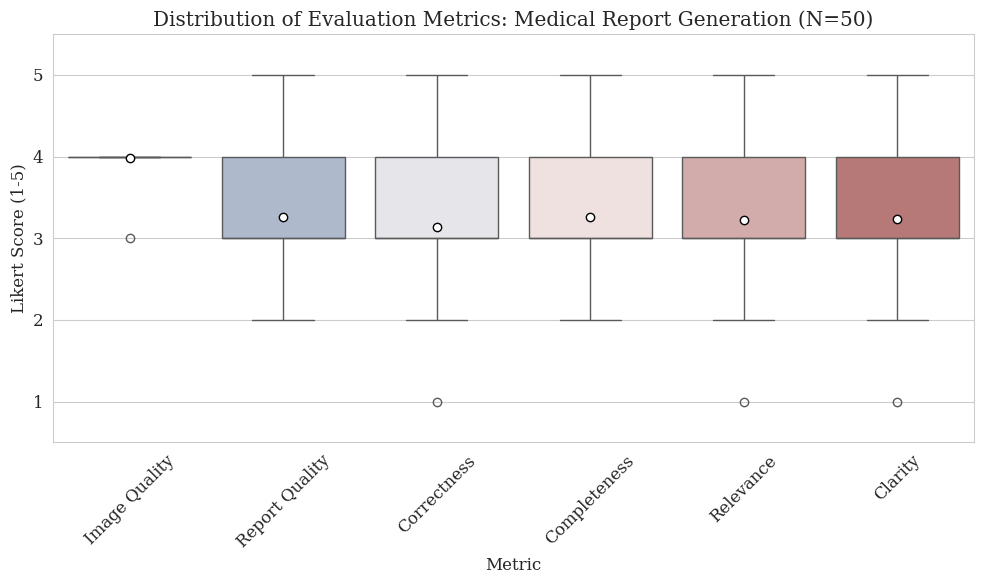

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_report_clean[report_metrics], palette="vlag", showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})
plt.title('Distribution of Evaluation Metrics: Medical Report Generation (N=50)')
plt.ylabel('Likert Score (1-5)')
plt.xlabel('Metric')
plt.ylim(0.5, 5.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('report_metrics_distribution.png', dpi=300)
plt.show()

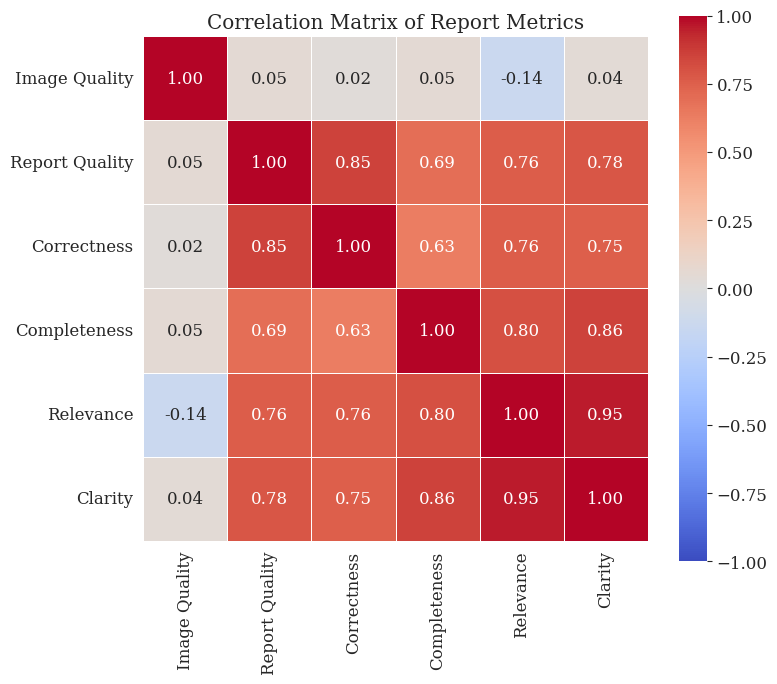

In [5]:
plt.figure(figsize=(8, 7))
corr_matrix = df_report_clean[report_metrics].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            vmin=-1, vmax=1, square=True, linewidths=.5)
plt.title('Correlation Matrix of Report Metrics')
plt.tight_layout()
plt.savefig('report_correlation_matrix.png', dpi=300)
plt.show()

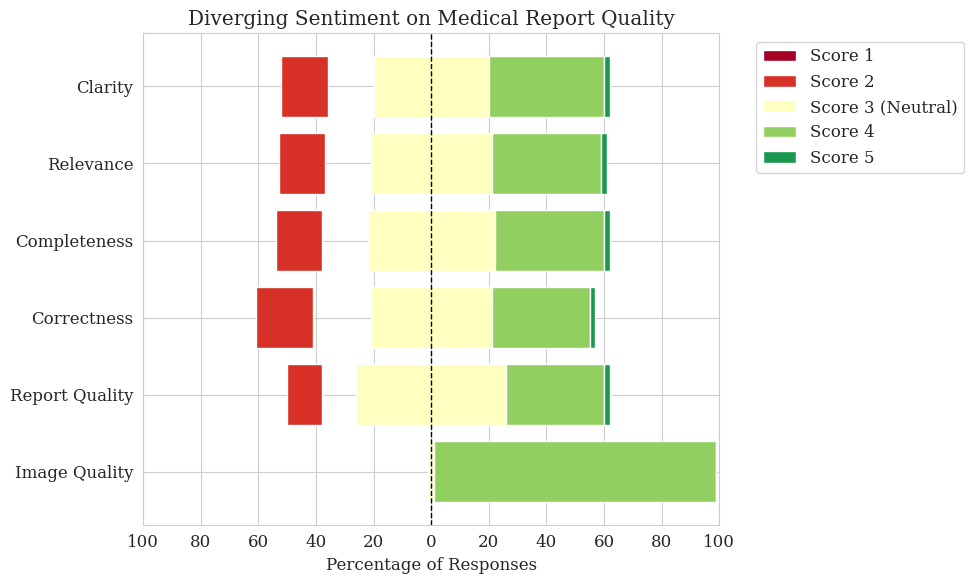

In [10]:
metrics = ['Image Quality', 'Report Quality', 'Correctness', 'Completeness', 'Relevance', 'Clarity']
# metrics = [ 'Correctness', 'Completeness', 'Relevance', 'Clarity']
df_clean = df_report.dropna(subset=metrics)
counts = df_clean[metrics].apply(pd.Series.value_counts).fillna(0).T

# Normalize to percentages
counts_pct = counts.div(counts.sum(axis=1), axis=0) * 100

# Left side (Negative): Scores 1 and 2. Middle (Neutral): Score 3. Right (Positive): Scores 4 and 5.
# split the Neutral (3) score: half goes left, half goes right.
negatives = counts_pct[1] + counts_pct[2] + (counts_pct[3] / 2)
positives = counts_pct[4] + counts_pct[5] + (counts_pct[3] / 2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(counts_pct.index, -counts_pct[1], left=-(counts_pct[3]/2)-counts_pct[2]-counts_pct[1], color='#a50026', label='Score 1') # Score 1
ax.barh(counts_pct.index, -counts_pct[2], left=-(counts_pct[3]/2)-counts_pct[2], color='#d73027', label='Score 2') # Score 2
ax.barh(counts_pct.index, counts_pct[3], left=-(counts_pct[3]/2), color='#ffffbf', label='Score 3 (Neutral)') # Score 3
ax.barh(counts_pct.index, counts_pct[4], left=(counts_pct[3]/2), color='#91cf60', label='Score 4') # Score 4
ax.barh(counts_pct.index, counts_pct[5], left=(counts_pct[3]/2)+counts_pct[4], color='#1a9850', label='Score 5') # Score 5

ax.axvline(0, color='black', linewidth=1, linestyle='--')
ax.set_xlabel('Percentage of Responses')
ax.set_title('Diverging Sentiment on Medical Report Quality')
ax.set_xlim(-100, 100)

xticks = np.arange(-100, 101, 20)
ax.set_xticks(xticks)
ax.set_xticklabels([str(abs(x)) for x in xticks])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Medical_report_diverging.png', dpi=300)
plt.show()

# ChatBot

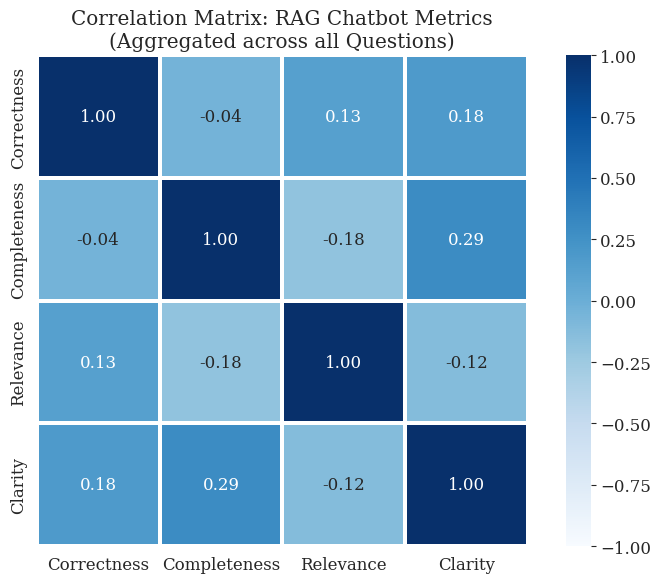

In [16]:
chatbot_metrics = ['Correctness', 'Completeness', 'Relevance', 'Clarity']
chatbot_corr = df_chatbot[chatbot_metrics].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(chatbot_corr, annot=True, cmap='Blues', fmt=".2f",
            vmin=-1, vmax=1, square=True, linewidths=1.5)
plt.title('Correlation Matrix: RAG Chatbot Metrics\n(Aggregated across all Questions)')
plt.tight_layout()
plt.savefig('ChatBot_correlation_matrix.png', dpi=300)
plt.show()

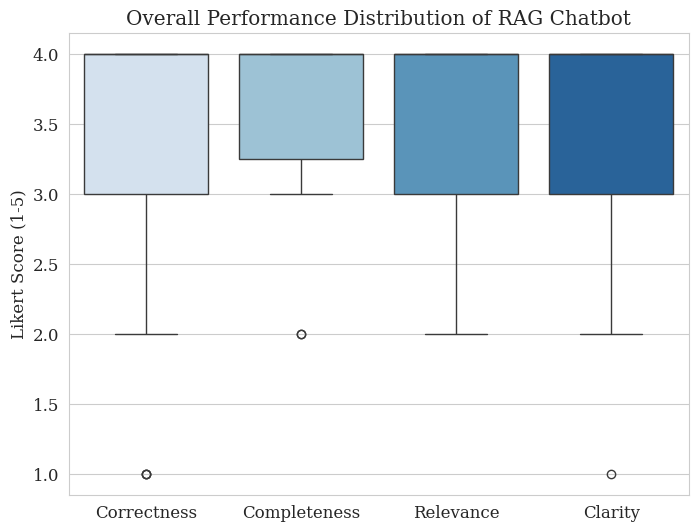

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_chatbot_clean[chatbot_metrics], palette="Blues")
plt.title('Overall Performance Distribution of RAG Chatbot')
plt.ylabel('Likert Score (1-5)')
plt.savefig('ChatBot_overallDistribution.png', dpi=300)
plt.show()

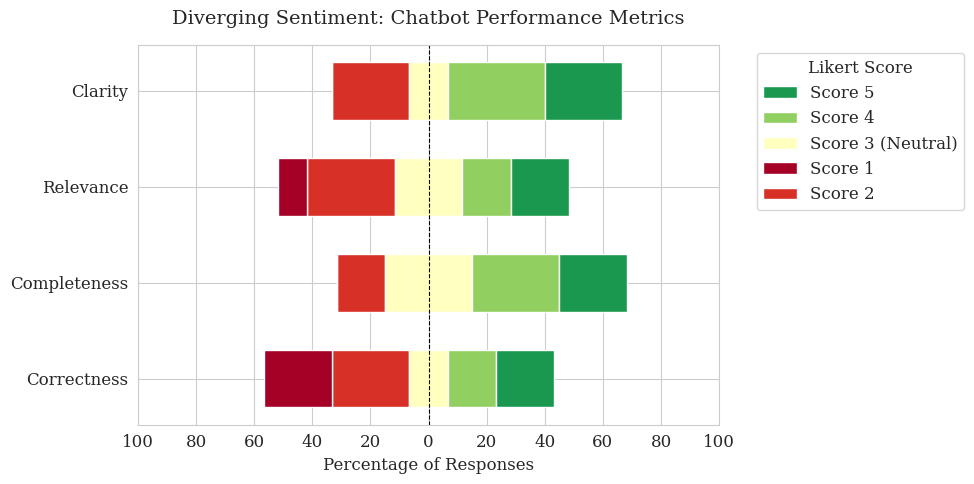

In [13]:
df_chatbot = pd.DataFrame({
        'Correctness': np.random.randint(1, 6, 30),
        'Completeness': np.random.randint(2, 6, 30),
        'Relevance': np.random.randint(1, 6, 30),
        'Clarity': np.random.randint(2, 6, 30)
    })

metrics = ['Correctness', 'Completeness', 'Relevance', 'Clarity']
counts = df_chatbot[metrics].apply(pd.Series.value_counts).fillna(0).T

for i in range(1, 6):
    if i not in counts.columns:
        counts[i] = 0

counts = counts[[1, 2, 3, 4, 5]] # Sort columns
counts_pct = counts.div(counts.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(10, 5))
mid_point = counts_pct[3] / 2

# Negative Bars (Left side)
ax.barh(counts_pct.index, -counts_pct[2], left=-mid_point,
        color='#d73027', label='Score 2', height=0.6)
ax.barh(counts_pct.index, -counts_pct[1], left=-mid_point - counts_pct[2],
        color='#a50026', label='Score 1', height=0.6)

# Neutral Bar (Centered)
ax.barh(counts_pct.index, counts_pct[3], left=-mid_point,
        color='#ffffbf', label='Score 3 (Neutral)', height=0.6)

# Positive Bars (Right side)
ax.barh(counts_pct.index, counts_pct[4], left=mid_point,
        color='#91cf60', label='Score 4', height=0.6)
ax.barh(counts_pct.index, counts_pct[5], left=mid_point + counts_pct[4],
        color='#1a9850', label='Score 5', height=0.6)

ax.axvline(0, color='black', linewidth=0.8, linestyle='--')
ax.set_title('Diverging Sentiment: Chatbot Performance Metrics', fontsize=14, pad=15)
ax.set_xlabel('Percentage of Responses')
ax.set_xlim(-100, 100)

xticks = np.arange(-100, 101, 20)
ax.set_xticks(xticks)
ax.set_xticklabels([str(abs(x)) for x in xticks])

handles, labels = ax.get_legend_handles_labels()
ax.legend(list(reversed(handles)), list(reversed(labels)),
          bbox_to_anchor=(1.05, 1), loc='upper left', title="Likert Score")

plt.tight_layout()
plt.savefig('chatbot_diverging_bar.png', dpi=300)
plt.show()

In [ ]:
# Performance by Question Number
# df_chat_grouped = df_chatbot_clean.melt(id_vars=['Question #'], value_vars=chatbot_metrics,
#                                         var_name='Metric', value_name='Score')

# plt.figure(figsize=(12, 6))
# sns.lineplot(data=df_chat_grouped, x='Question #', y='Score', hue='Metric', marker='o', ci=None)
# plt.title('Chatbot Performance Across Different Question Types')
# plt.ylabel('Average Likert Score')
# plt.xlabel('Question Set ID (1-6)')
# plt.xticks(range(1, 7))
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


In [14]:
print("--- Report Generation Summary ---")
print(df_report_clean[report_metrics].describe().T[['mean', 'std']])

--- Report Generation Summary ---
                mean       std
Image Quality   3.98  0.141421
Report Quality  3.26  0.694292
Correctness     3.14  0.833238
Completeness    3.26  0.750782
Relevance       3.22  0.815413
Clarity         3.24  0.822143


In [15]:
print("\n--- Chatbot Summary ---")
print(df_chatbot_clean[chatbot_metrics].describe().T[['mean', 'std']])


--- Chatbot Summary ---
                  mean       std
Correctness   3.300000  1.055364
Completeness  3.666667  0.606478
Relevance     3.433333  0.773854
Clarity       3.333333  0.922266
